In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('count_by_yr_Final.csv',index_col=0)

In [3]:
data.shape

(128, 191)

In [4]:
data.fillna(0)
data.head()

,EMS_RESPONSE_CT,POPULATION_ESTIMATE,PCT_BELOW_POVERTY,PCT_UNEMPLOYED,PCT_SINGLE_PARENT,PCT_MINORITY,PCT_POOR_ENGLISH,PCT_OCCUPIED_HOUSING,PCT_MOBILE_HOMES,PCT_NO_VEHICLE,...,zip.BuprPhys,Longitude.BuprPhys,Latitude.BuprPhys,CensusBlock.BuprPhys,Address.BupFac,Longitude.BupFac,Latitude.BupFac,CensusBlock.BupFac,PsychPhysGRP.Count,ERGRP.Count
CENSUSTRACT_FIPS,,,,,,,,,,,,,,,,,,,,,
21015070100,1,6646,15.3,8.2,9.2,16.0,2.7,5.0,0.0,15.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39061000200,15,927,46.3,32.4,18.3,91.6,1.6,1.7,0.0,65.7,...,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,NaN,8.0
39061000700,198,2038,11.5,5.0,1.2,40.1,1.8,1.8,0.0,29.7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,6.0
39061000900,100,1238,55.9,18.2,16.4,48.2,0.0,1.0,0.0,36.9,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,3.0
39061001000,30,1452,34.1,18.2,20.7,50.1,0.3,0.7,0.0,34.8,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,5.0,2.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

### Below is attempt at using LOGISTIC REGRESSION and train_test_split to analyze variables' correlation with outcome

In [6]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(data[data.columns.difference(['EMS_RESPONSE_CT'])], 
                                              data['EMS_RESPONSE_CT'],random_state=5)


In [7]:
Xlr = Xlr.fillna(-1)
Xlr = Xlr.replace(np.nan, -2)
#Y = Y.fillna(-1)
#Y = Y.replace(np.nan, -2)
Xtestlr = Xtestlr.fillna(-1)
Xtestlr = Xtestlr.replace(np.nan, -2)

In [8]:
LogReg = LogisticRegression()
LogReg.fit(Xlr, ylr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:

# Print the accuracy from the testing data.
print(accuracy_score(LogReg.predict(Xtestlr), ytestlr))

0.03125


### 



### Running a RandomForestDecisionTree model below

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt 

In [11]:
from sklearn.ensemble import RandomForestRegressor
#mention this as detour in EDA
X = data[data.columns.difference(['EMS_RESPONSE_CT'])]
Y = data['EMS_RESPONSE_CT']
names = data.columns


In [12]:
X = X.fillna(-1)
X = X.replace(np.nan, -2)
Y = Y.fillna(-1)
Y = Y.replace(np.nan, -2)

In [13]:
#Running on Random Forest Classifier model
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X, Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

                                           0  \
1                                              
total_claim_count_ge65.PUFNPIMean   0.302919   
total_30_day_fill_count.PUFNPIMean  0.099637   
VEHICLE_LOW_ACCESS_HALF_MILE_S      0.061735   
PCT_NO_HIGH_SCHOOL                  0.057185   
total_day_supply.PUFNPIMean         0.051920   
VEHICLE_LOW_ACCESS_HALF_MILE_N      0.050982   
VEHICLE_LOW_ACCESS_20_MILES_N       0.049235   
total_claim_count.PUFNPIMean        0.034401   
bene_count.PUFNPIMean               0.033612   
VEHICLE_LOW_ACCESS_1_MILE_S         0.024883   

                                                                     1  
1                                                                       
total_claim_count_ge65.PUFNPIMean    total_claim_count_ge65.PUFNPIMean  
total_30_day_fill_count.PUFNPIMean  total_30_day_fill_count.PUFNPIMean  
VEHICLE_LOW_ACCESS_HALF_MILE_S          VEHICLE_LOW_ACCESS_HALF_MILE_S  
PCT_NO_HIGH_SCHOOL                                  PCT_NO

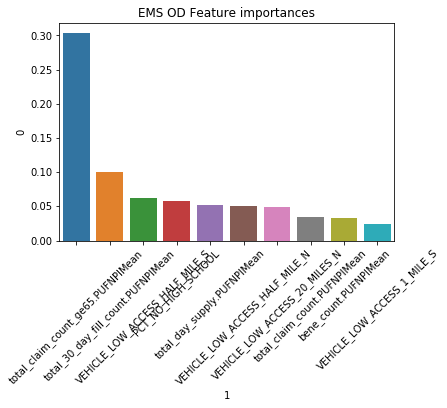

In [14]:

EMS_Response = pd.DataFrame(sorted(zip(rf.feature_importances_,names),reverse=True)[:10])
EMS_Response = EMS_Response.set_index(EMS_Response[1],drop=True)
print(EMS_Response)
sns.barplot(x=EMS_Response[1], y=EMS_Response[0])
plt.xticks(rotation=45)
plt.title("EMS OD Feature importances")
plt.show()